# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from glob import glob
from hypnospy import Wearable
from hypnospy.data import ActiwatchSleepData
from hypnospy.analysis import SleepWakeAnalysis
from hypnospy.analysis import NonWearingDetector
from hypnospy.analysis import SleepBoudaryDetector
from hypnospy.analysis import CircadianAnalysis
from hypnospy.analysis import PhysicalActivity
from hypnospy import Experiment
from hypnospy.analysis import Viewer

from tqdm import trange, tqdm
import pickle

# Read dataset - HCHS

In [2]:
# Configure an Experiment
exp = Experiment()

file_path = "HypnosPy-master/data/small_collection_hchs/*"

# Iterates over a set of files in a directory.
# Unfortunately, we have to do it manually with RawProcessing because we are modifying the annotations
for file in glob(file_path):
    pp = ActiwatchSleepData(file, col_for_datetime="time", col_for_pid="pid")
    w = Wearable(pp)  # Creates a wearable from a pp object
    exp.add_wearable(w)
    print(w.pid)

freq = 30
exp.set_freq_in_secs(freq)


# tsp = NonWearingDetector(exp)
# tsp.fill_no_activity(-0.0001)
# tsp.detect_non_wear(strategy="choi")
# tsp.detect_non_wear(strategy="choi2011")

# tsp.check_consecutive_days(5)
# # print("Valid days:", tsp.get_valid_days())
# # print("Invalid days:", tsp.get_invalid_days())

# # strategy: "annotation", "hr", "angle"
# # sbd = SleepBoudaryDetector(exp)
# # sbd.detect_sleep_boundaries(strategy="annotation", 
# #                             annotation_hour_to_start_search=0,
# #                             annotation_col='hyp_annotation',
# #                             output_col='hyp_sleep_period',
# #                             annotation_only_largest_sleep_period=False)
# tsp.invalidate_day_if_no_sleep(sleep_period_col='hyp_sleep_period')
# print("Valid days:", tsp.get_valid_days())

# tsp.check_valid_days(max_non_wear_minutes_per_day=180, min_activity_threshold=0)
# print("Valid days:", tsp.get_valid_days())
# print("Invalid days:", tsp.get_invalid_days())

29881087
29883363
29909542
29915385
29950301


# Use PhysicalActivity

In [4]:
pa = PhysicalActivity(exp, cutoffs=[399, 1404], names=['lpa', 'mvpa', 'vpa'])
pa.generate_pa_columns(based_on='activity')

print('cutoffs:', exp.get_all_wearables()[0].pa_cutoffs)
print('cutoffs region names:', exp.get_all_wearables()[0].pa_names)

cutoffs: [399, 1404]
cutoffs region names: ['lpa', 'mvpa', 'vpa']


# Find count of bouts per day per wearable

In [6]:
pa.get_bouts(pa_col='mvpa', length_in_minutes=10, decomposite_bouts=True)

{'29881087': hyp_exp_day
 0    0.0
 1    0.0
 2    0.0
 3    1.0
 4    0.0
 5    0.0
 6    0.0
 7    0.0
 dtype: float64,
 '29883363': hyp_exp_day
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6    1.0
 7    0.0
 8    0.0
 dtype: float64,
 '29909542': hyp_exp_day
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6    0.0
 7    0.0
 dtype: float64,
 '29915385': hyp_exp_day
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6    0.0
 7    0.0
 8    0.0
 dtype: float64,
 '29950301': hyp_exp_day
 0    0.0
 1    0.0
 2    0.0
 3    0.0
 4    0.0
 5    0.0
 6    0.0
 7    0.0
 8    0.0
 dtype: float64}

# Find stats of activity per hour per day per wearable

In [7]:
pa.get_stats_pa_representation()

pid        mean  median         std  min  \
hyp_exp_day hyp_time_col                                                  
0           10            29881087   25.666667    20.5   29.042498  0.0   
            11            29881087   60.233333     6.0   98.341690  0.0   
            12            29881087  249.900000   258.0  144.107826  0.0   
            13            29881087  200.616667   198.0  131.463909  0.0   
            14            29881087  159.416667   119.0  140.532755  0.0   
...                            ...         ...     ...         ...  ...   
8           5             29950301         NaN     NaN         NaN  NaN   
            6             29950301         NaN     NaN         NaN  NaN   
            7             29950301         NaN     NaN         NaN  NaN   
            8             29950301         NaN     NaN         NaN  NaN   
            9             29950301         NaN     NaN         NaN  NaN   

                            max  skewness  kurtosis  nunique  
hyp_exp_day hyp_time_col                                      
0           10             72.0  0.756596 -0.649564        6  
            11            449.0  1.997167  3.665924       49  
            12            703.0  0.072988 -0.421131       58  
            13            639.0  0.773843  0.780510       66  
            14            599.0  1.193613  0.833582       69  
...                         ...       ...       ...      ...  
8           5               NaN       NaN       NaN        0  
            6               NaN       NaN       NaN        0  
            7               NaN       NaN       NaN        0  
            8               NaN       NaN       NaN        0  
            9               NaN       NaN       NaN        0  

[905 rows x 9 columns]

# draw physical activity within using Viewer module

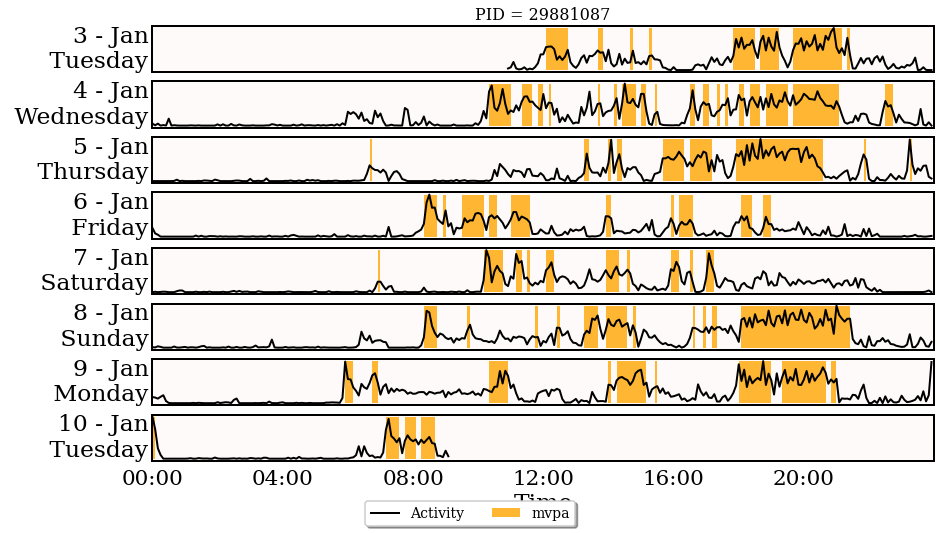

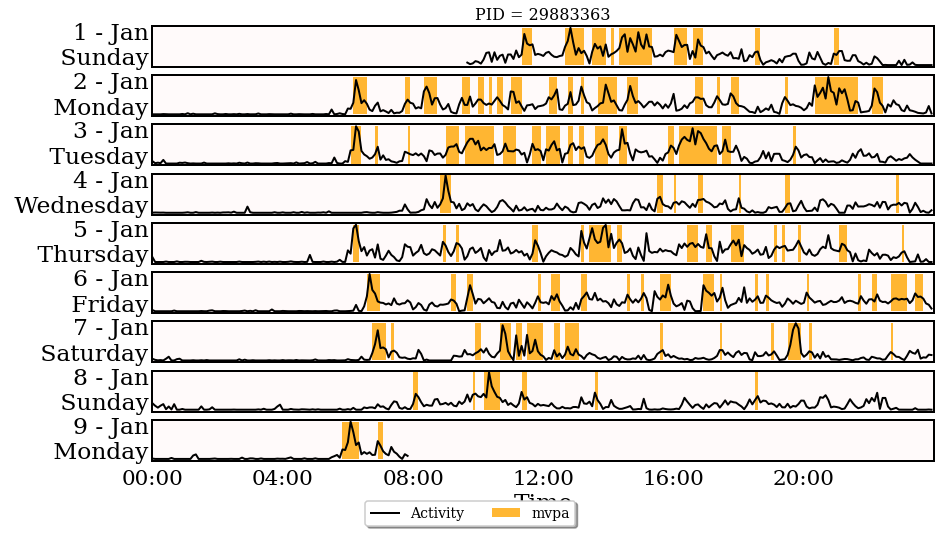

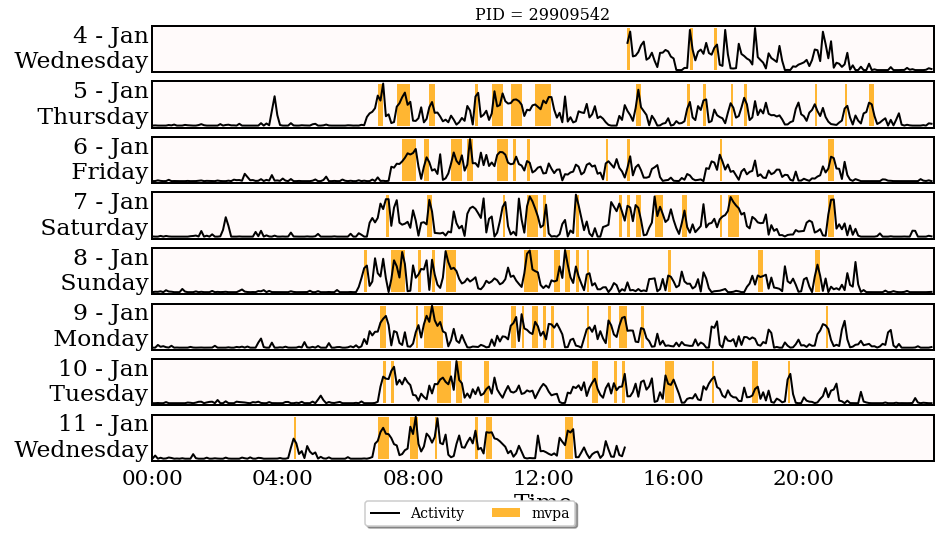

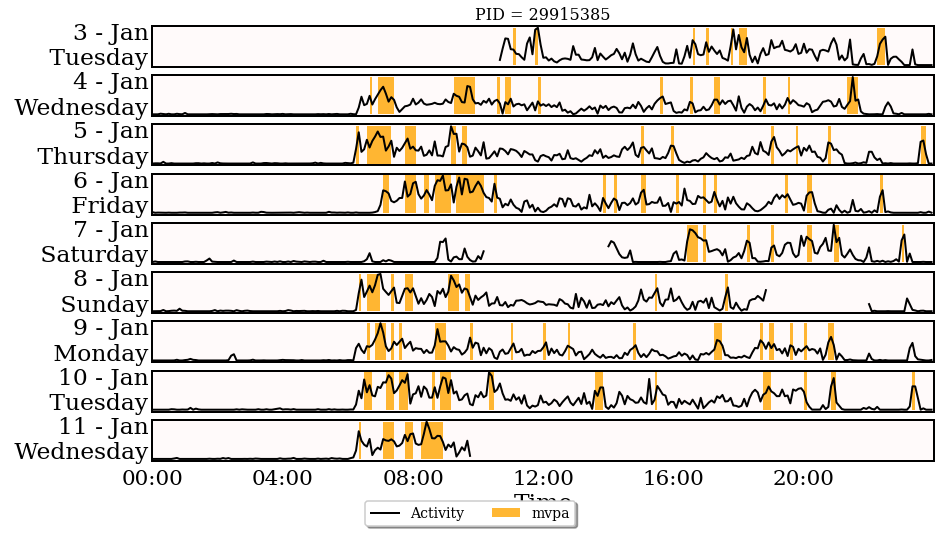

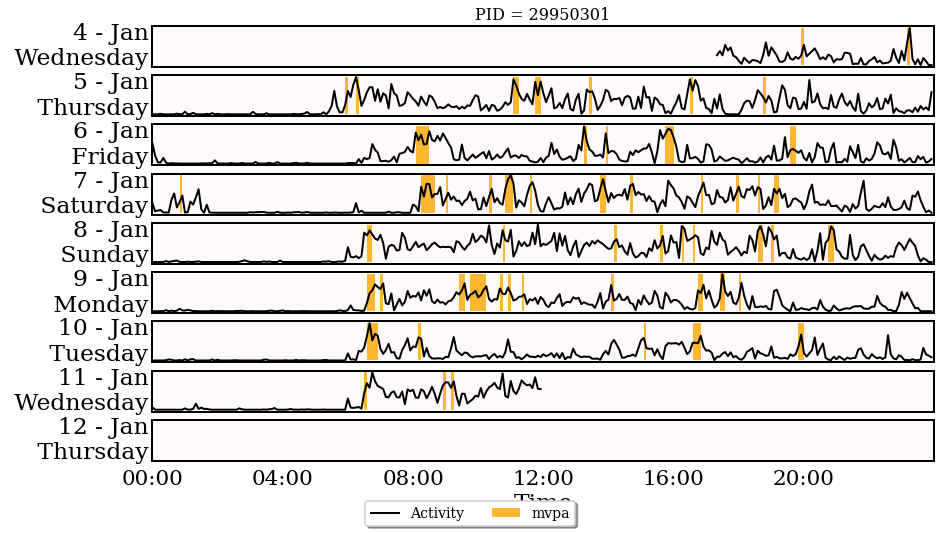

In [8]:
Viewer(exp).view_signals(signal_categories=['activity'], signal_as_area=['mvpa'], 
               colors ={"area": ["orange"]}, alphas ={"area": 0.8},
              resample_to='5T')

## draw MVPA boxplot
Each row represents the wearable MVPA boxplot
<br/>X-axis = 24 hour
<br/>Y-axis = MVPA box plot for 7 days

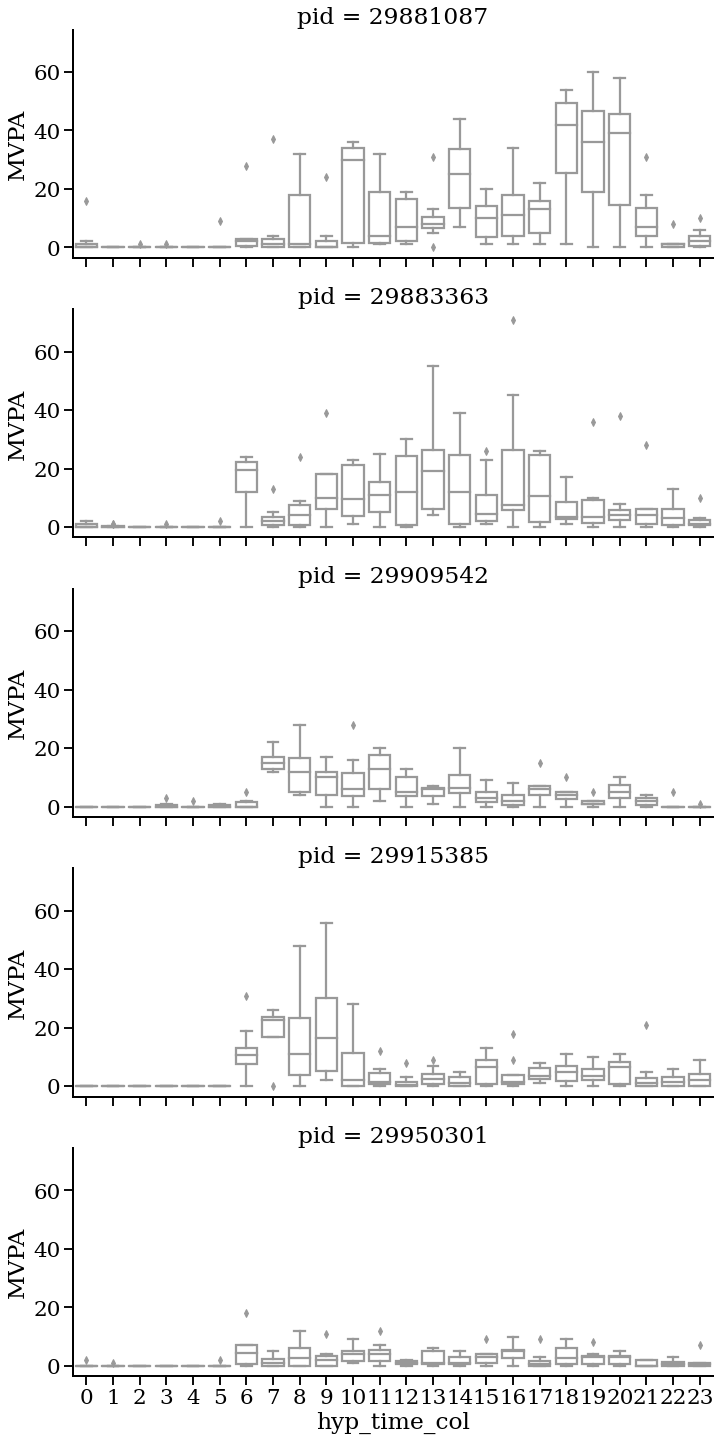

In [9]:
data = pa.get_binned_pa_representation()
data = data.reset_index()
# data = data[data['pid'] == '29881087']

g = sns.catplot(x="hyp_time_col", y="MVPA", data=data, 
                kind="box", color='white',
                row='pid',
                height=4, aspect=2.5)
